In [60]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [61]:
df=pd.read_csv(r"C:\Users\HP\Downloads\test_AV3.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y


In [62]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [63]:
df.isnull().any()

Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [64]:
df=df.fillna(method='ffill')
df.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [65]:
df['Dependents']=df['Dependents'].replace(['3+'],5)
df['Dependents']

0      0
1      1
2      2
3      2
4      0
      ..
362    5
363    0
364    0
365    0
366    0
Name: Dependents, Length: 367, dtype: object

In [66]:
X=df.drop(['Loan_Status','Loan_ID'],axis='columns')
y=df['Loan_Status']

In [67]:
from sklearn.preprocessing import LabelEncoder
le_Gender = LabelEncoder()
le_Married = LabelEncoder()
le_Education = LabelEncoder()
le_Self_Employed = LabelEncoder()
le_Property_Area = LabelEncoder()

In [68]:
X['Gender _n'] = le_Gender.fit_transform(X['Gender'])
X['Married_n'] = le_Married.fit_transform(X['Married'])
X['Education_n'] = le_Education.fit_transform(X['Education'])
X['Self_Employed_n'] = le_Self_Employed.fit_transform(X['Self_Employed'])
X['Property_Area_n'] = le_Property_Area.fit_transform(X['Property_Area'])
xn=X.drop(['Gender','Married','Education','Self_Employed','Property_Area'],axis='columns')
xn

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender _n,Married_n,Education_n,Self_Employed_n,Property_Area_n
0,0,5720,0,110.0,360.0,1.0,1,1,0,0,2
1,1,3076,1500,126.0,360.0,1.0,1,1,0,0,2
2,2,5000,1800,208.0,360.0,1.0,1,1,0,0,2
3,2,2340,2546,100.0,360.0,1.0,1,1,0,0,2
4,0,3276,0,78.0,360.0,1.0,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,5,4009,1777,113.0,360.0,1.0,1,1,1,1,2
363,0,4158,709,115.0,360.0,1.0,1,1,0,0,2
364,0,3250,1993,126.0,360.0,1.0,1,0,0,0,1
365,0,5000,2393,158.0,360.0,1.0,1,1,0,0,0


## Logistic Regression: ##

In [87]:
X_train, X_test, y_train, y_test = train_test_split(xn,y,train_size=0.6)

In [88]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [89]:
model.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
y_predicted=model.predict(X_test)
y_predicted

array(['Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y'], dtype=object)

In [91]:
model.predict_proba(X_test)

array([[0.01608299, 0.98391701],
       [0.43280336, 0.56719664],
       [0.0398563 , 0.9601437 ],
       [0.88897342, 0.11102658],
       [0.02238852, 0.97761148],
       [0.04319437, 0.95680563],
       [0.03392129, 0.96607871],
       [0.05259334, 0.94740666],
       [0.0719346 , 0.9280654 ],
       [0.04721265, 0.95278735],
       [0.04191405, 0.95808595],
       [0.03951471, 0.96048529],
       [0.02220629, 0.97779371],
       [0.03276459, 0.96723541],
       [0.78610567, 0.21389433],
       [0.0085199 , 0.9914801 ],
       [0.06370926, 0.93629074],
       [0.03605726, 0.96394274],
       [0.00888778, 0.99111222],
       [0.03445794, 0.96554206],
       [0.05602138, 0.94397862],
       [0.82930375, 0.17069625],
       [0.83083068, 0.16916932],
       [0.04310501, 0.95689499],
       [0.76917555, 0.23082445],
       [0.0422943 , 0.9577057 ],
       [0.03590645, 0.96409355],
       [0.04930946, 0.95069054],
       [0.04372947, 0.95627053],
       [0.0384598 , 0.9615402 ],
       [0.

In [92]:
log=model.score(X_test,y_test)
log

0.9863945578231292

## Decision Tree ##

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xn,y,train_size=0.8)

In [98]:
from sklearn import tree
model1 = tree.DecisionTreeClassifier()

In [99]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [100]:
decision_tree=model.score(x_test,y_test)
decision_tree

0.9864864864864865

## Support Vector Machine ##

In [170]:
from sklearn.model_selection import train_test_split

In [175]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(xn,y,test_size=0.2)

In [176]:
from sklearn.svm import SVC
model2 = SVC()

In [177]:
model2.fit(Xn_train, yn_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [178]:
Supportvectormachine=model2.score(Xn_test, yn_test)
Supportvectormachine

0.8918918918918919

 ## K Nearest Neighbour ##

In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [107]:
scaler.fit(xn)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [108]:
scaled_features = scaler.transform(xn)

In [109]:
scaled_features

array([[-0.67251052,  0.1864605 , -0.67333511, ..., -0.5448117 ,
        -0.33985515,  1.11876379],
       [-0.05081944, -0.35269225, -0.02984821, ..., -0.5448117 ,
        -0.33985515,  1.11876379],
       [ 0.57087165,  0.0396413 ,  0.09884917, ..., -0.5448117 ,
        -0.33985515,  1.11876379],
       ...,
       [-0.67251052, -0.31721094,  0.18164449, ..., -0.5448117 ,
        -0.33985515, -0.09598861],
       [-0.67251052,  0.0396413 ,  0.353241  , ..., -0.5448117 ,
        -0.33985515, -1.31074101],
       [-0.67251052,  0.89608667, -0.67333511, ..., -0.5448117 ,
         2.94243007, -1.31074101]])

In [110]:
xn.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender _n', 'Married_n',
       'Education_n', 'Self_Employed_n', 'Property_Area_n'],
      dtype='object')

In [111]:
df_feat = pd.DataFrame(scaled_features,columns=xn.columns)
df_feat.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender _n,Married_n,Education_n,Self_Employed_n,Property_Area_n
0,-0.672511,0.186461,-0.673335,-0.427813,0.271311,0.446482,0.511046,0.758358,-0.544812,-0.339855,1.118764
1,-0.050819,-0.352692,-0.029848,-0.166596,0.271311,0.446482,0.511046,0.758358,-0.544812,-0.339855,1.118764
2,0.570872,0.039641,0.098849,1.172136,0.271311,0.446482,0.511046,0.758358,-0.544812,-0.339855,1.118764
3,0.570872,-0.502774,0.418877,-0.591073,0.271311,0.446482,0.511046,0.758358,-0.544812,-0.339855,1.118764
4,-0.672511,-0.311909,-0.673335,-0.950245,0.271311,0.446482,0.511046,-1.318638,1.835497,-0.339855,1.118764


In [132]:
Xx_train, Xx_test, yx_train, yx_test = train_test_split(scaled_features,y,test_size=0.3)

In [133]:
from sklearn.neighbors import KNeighborsClassifier

In [147]:
knn = KNeighborsClassifier(n_neighbors=25)

In [148]:
knn.fit(Xx_train,yx_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [149]:
pred = knn.predict(Xx_test)
pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [150]:
knn.score(Xx_test,yx_test)

0.972972972972973

In [151]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [152]:
print(confusion_matrix(yx_test,pred))

[[11  2]
 [ 1 97]]


In [153]:
print(classification_report(yx_test,pred))

              precision    recall  f1-score   support

           N       0.92      0.85      0.88        13
           Y       0.98      0.99      0.98        98

    accuracy                           0.97       111
   macro avg       0.95      0.92      0.93       111
weighted avg       0.97      0.97      0.97       111



In [154]:
accuracy_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,xn,y,cv=10)
    accuracy_rate.append(score.mean())

In [155]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,xn,y,cv=10)
    error_rate.append(1-score.mean())

In [156]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xx_train,yx_train)
    pred_i = knn.predict(Xx_test)
    error_rate.append(np.mean(pred_i != yx_test))

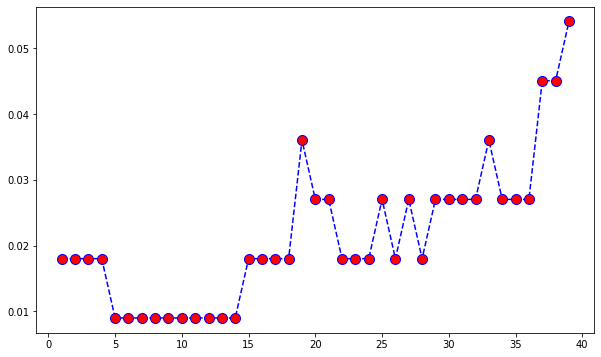

In [157]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)

In [158]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(Xx_train,yx_train)
pred = knn.predict(Xx_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(yx_test,pred))
print('\n')
print(classification_report(yx_test,pred))

WITH K=1


[[13  0]
 [ 1 97]]


              precision    recall  f1-score   support

           N       0.93      1.00      0.96        13
           Y       1.00      0.99      0.99        98

    accuracy                           0.99       111
   macro avg       0.96      0.99      0.98       111
weighted avg       0.99      0.99      0.99       111



In [159]:
knearestneighbour=knn.score(Xx_test,yx_test)
knearestneighbour

0.990990990990991

## Comparing ##

In [179]:
compare=pd.DataFrame({'K Nearest Neighbour':  knearestneighbour},index=['Score'])
compare['Logistic Regression']=log
compare['Decision Tree']=decision_tree
compare['Support Vector Machine']=Supportvectormachine
compare

,K Nearest Neighbour,Logistic Regression,Decision Tree,Support Vector Machine
Score,0.990991,0.986395,0.986486,0.891892
